# ----------------------------------------- OASIS INFOBYTE -------------------------------------------

# Name - Akash Prakash Mandlik
# Task3 - Car Price Prediction

# Step-1) Business Problem Understanding 

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Step-2) Data Understanding

In [2]:
df = pd.read_excel("car_data.xlsx")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
continuous = ["wheelbase", "carlength", "carwidth", "carheight", "boreratio", "stroke", "compressionratio", "price"]
continuous

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'price']

In [5]:
discrete = ["CarName", "fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]
discrete

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

# Step-3) Data Pre-processing

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df[continuous].describe()

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,3.329756,3.255415,10.142537,13276.710571
std,6.021776,12.337289,2.145204,2.443522,0.270844,0.313597,3.972040,7988.852332
min,86.600000,141.100000,60.300000,47.800000,2.540000,2.070000,7.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,3.150000,3.110000,8.600000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,3.310000,3.290000,9.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,3.580000,3.410000,9.400000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,3.940000,4.170000,23.000000,45400.000000


In [8]:
df[discrete].describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [9]:
df.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [10]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [11]:
df["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [12]:
df["fueltype"].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [13]:
df["aspiration"].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [14]:
df["doornumber"].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [15]:
df["carbody"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [16]:
df["drivewheel"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [17]:
df["enginelocation"].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [18]:
df["enginetype"].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [19]:
df["cylindernumber"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [20]:
df["fuelsystem"].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

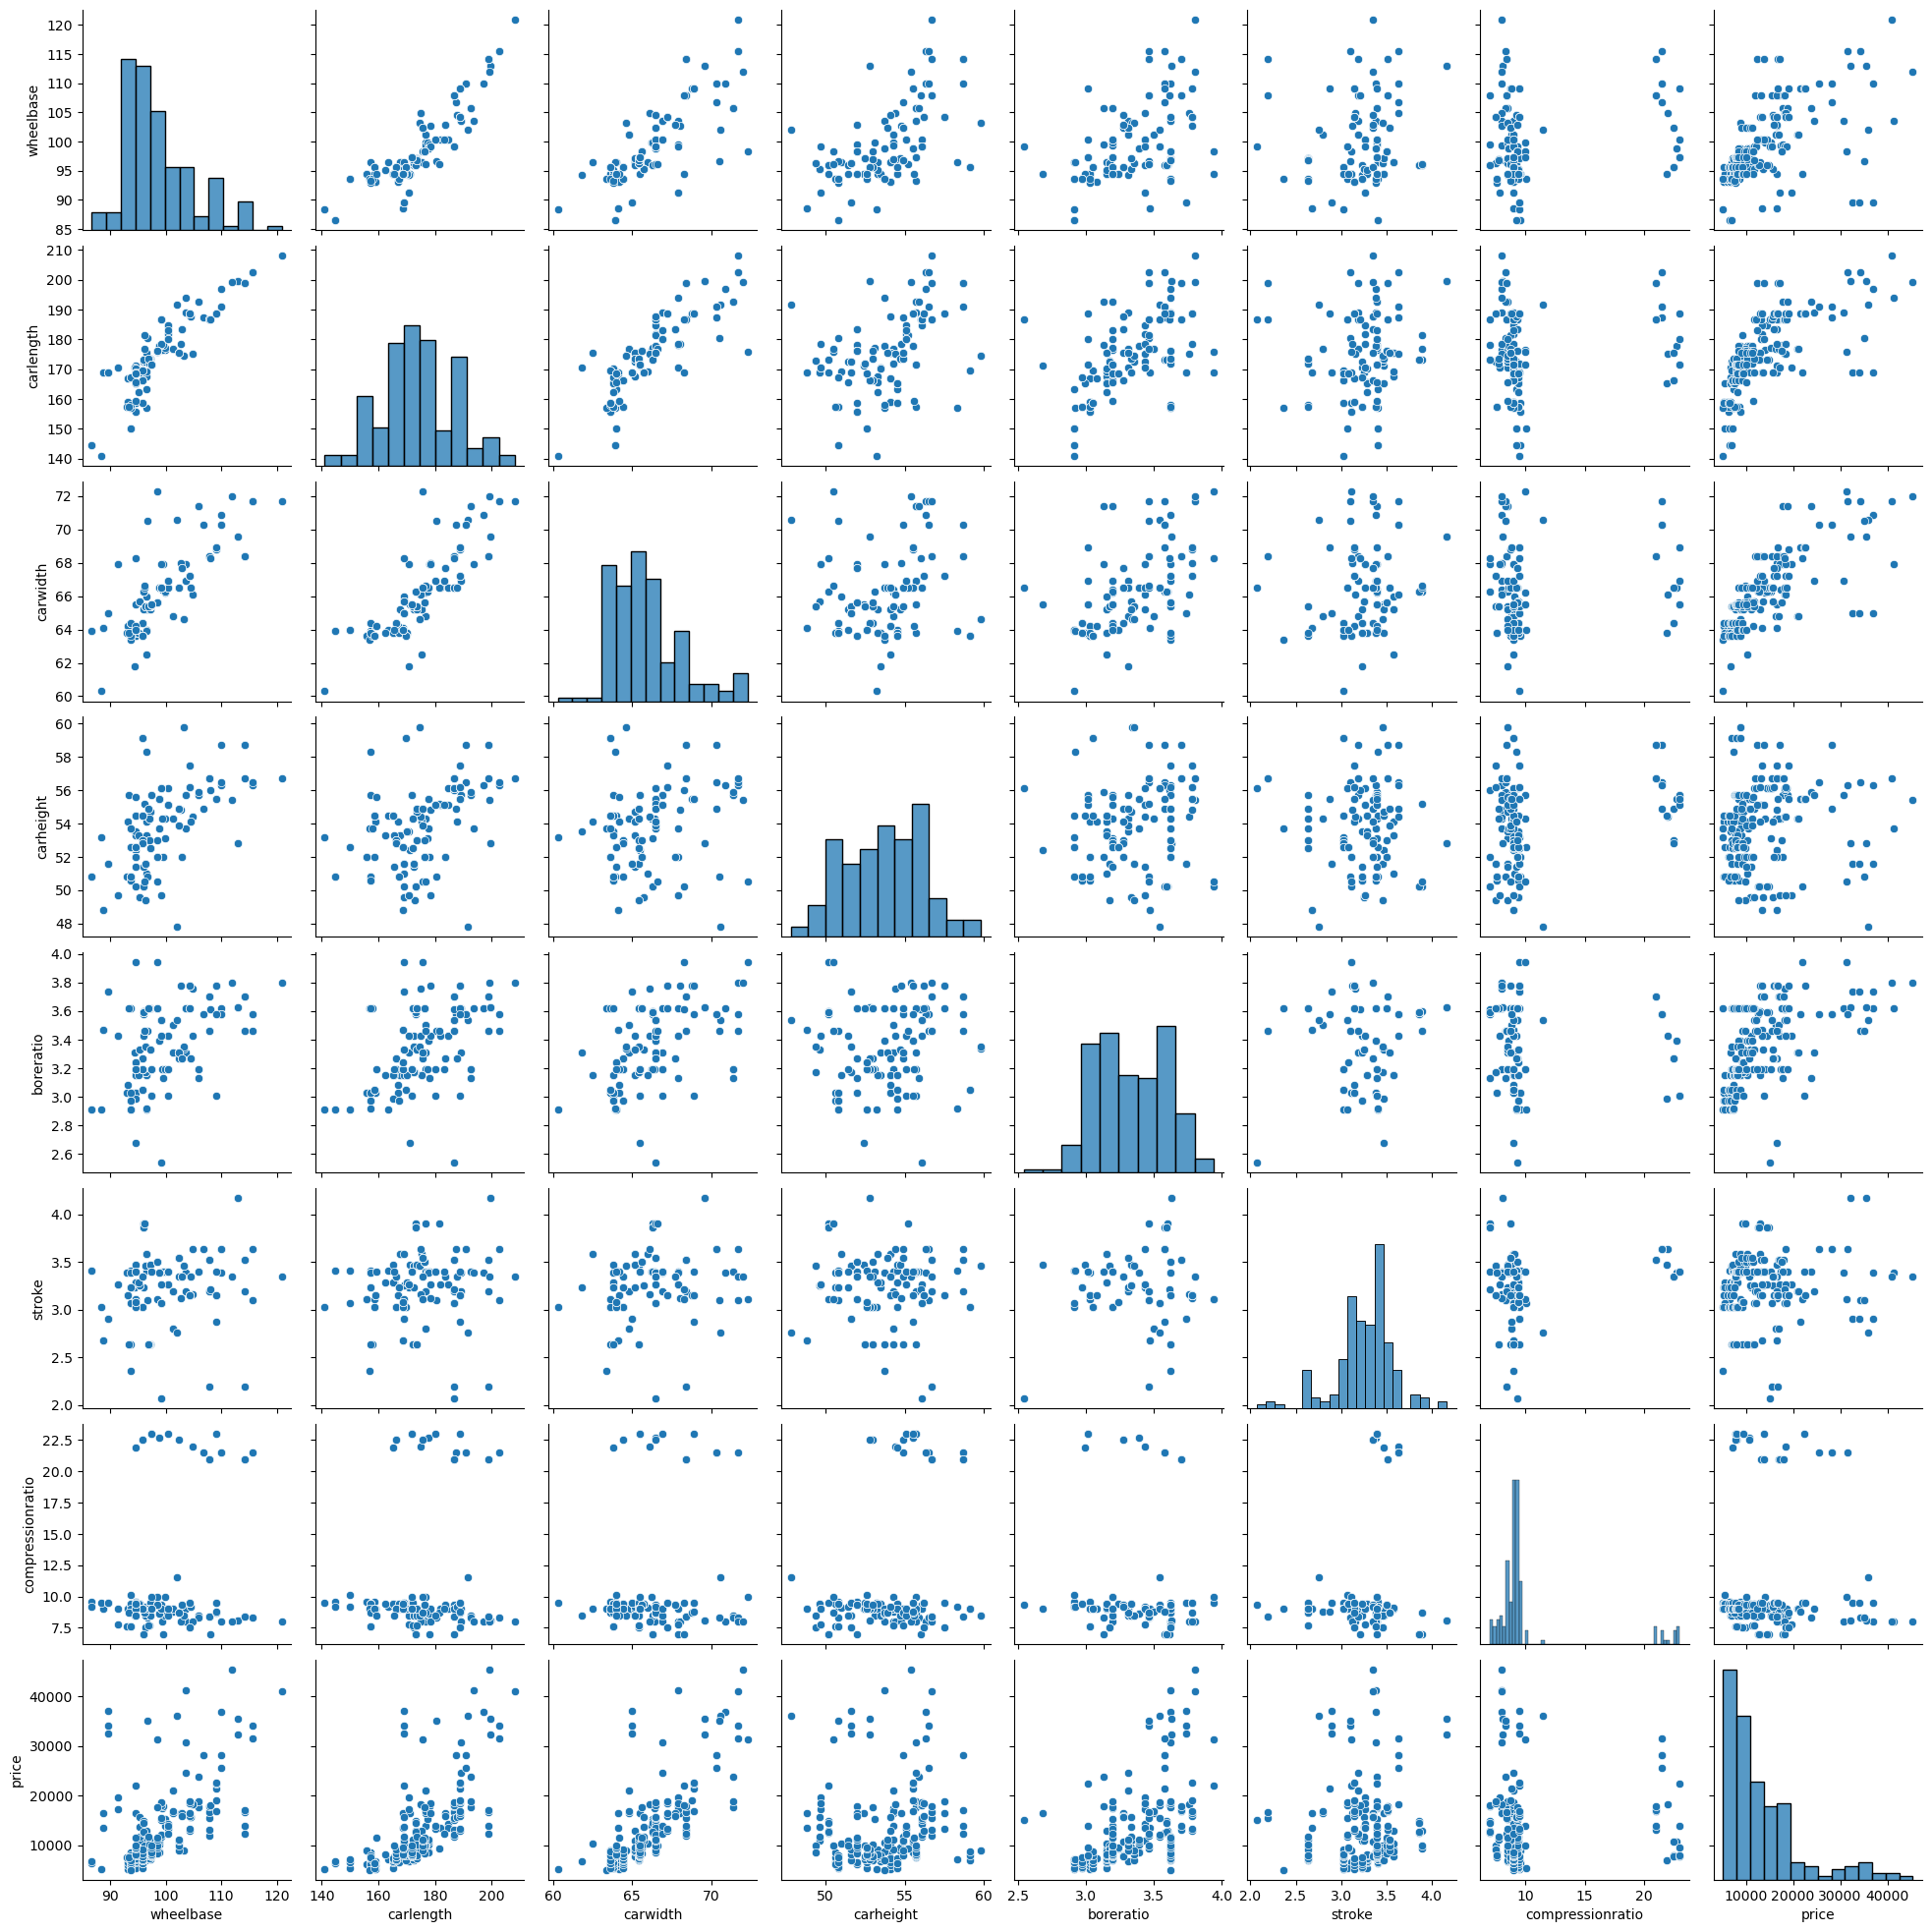

In [21]:
sns.pairplot(df[continuous])
plt.show()

In [22]:
h_m = df[continuous].corr()

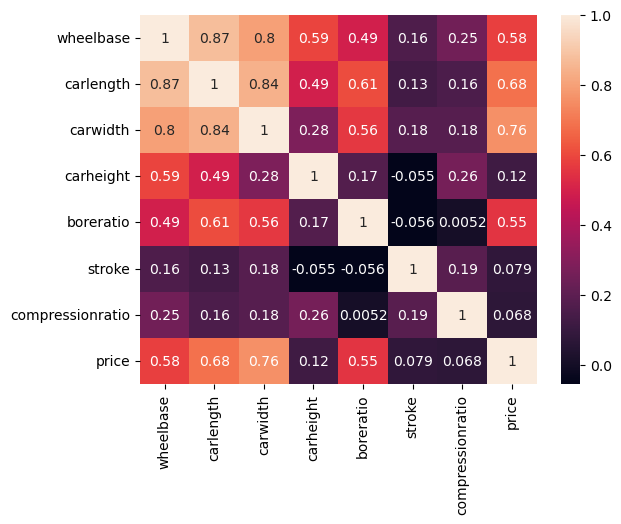

In [23]:
sns.heatmap(h_m, annot=True)
plt.show()

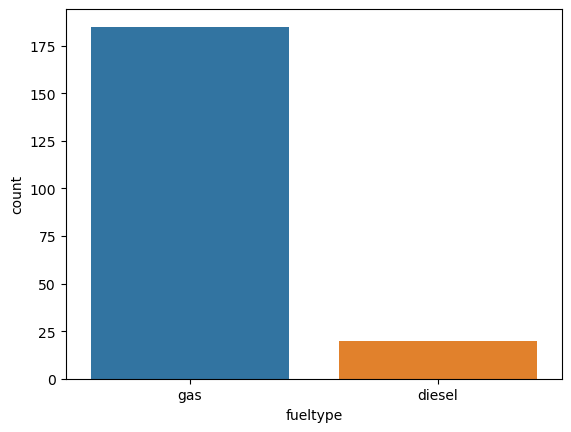

In [24]:
sns.countplot(x = df["fueltype"])
plt.show()

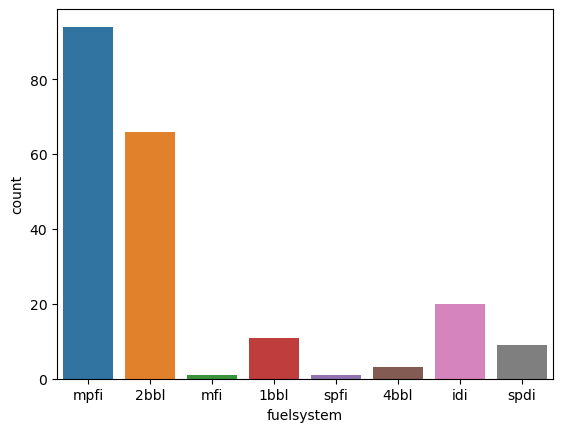

In [25]:
sns.countplot(x = df["fuelsystem"])
plt.show()

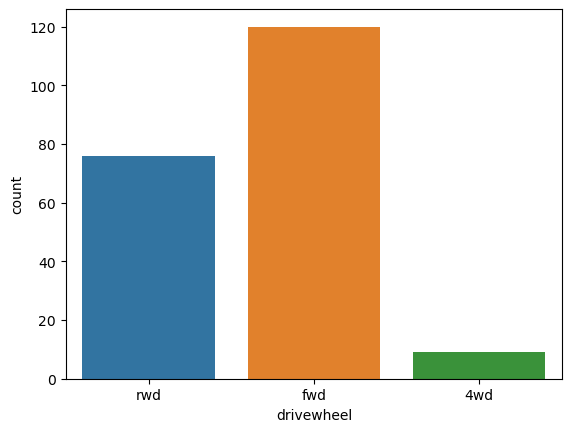

In [26]:
sns.countplot(x = df["drivewheel"])
plt.show()

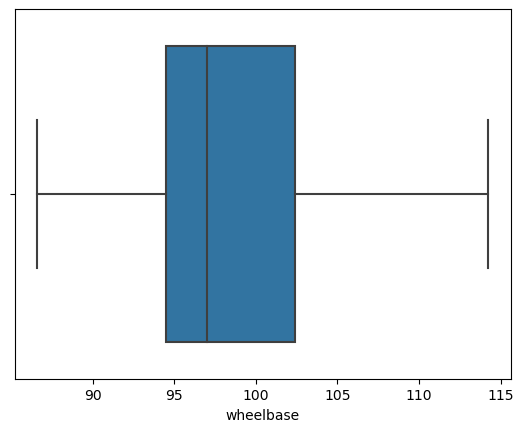

In [28]:
sns.boxplot(x = df_win["wheelbase"])
plt.show()

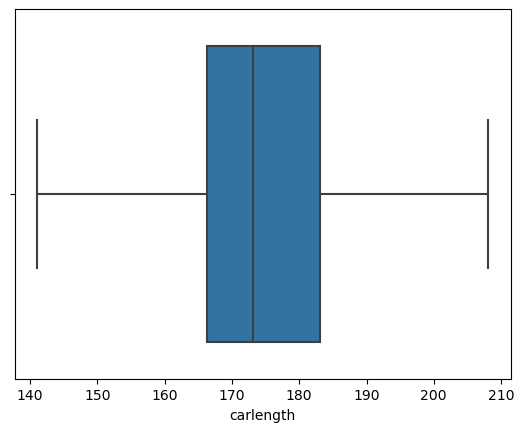

In [29]:
sns.boxplot(x = df_win["carlength"])
plt.show()

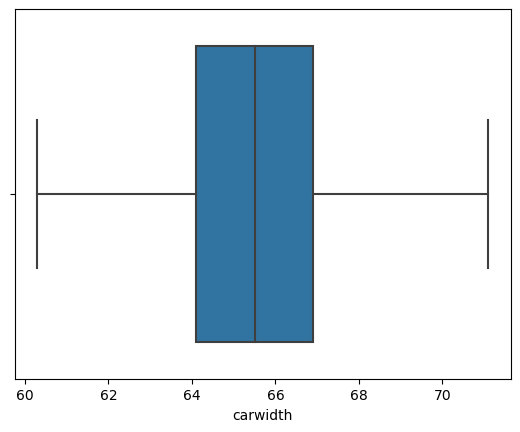

In [30]:
sns.boxplot(x = df_win["carwidth"])
plt.show()

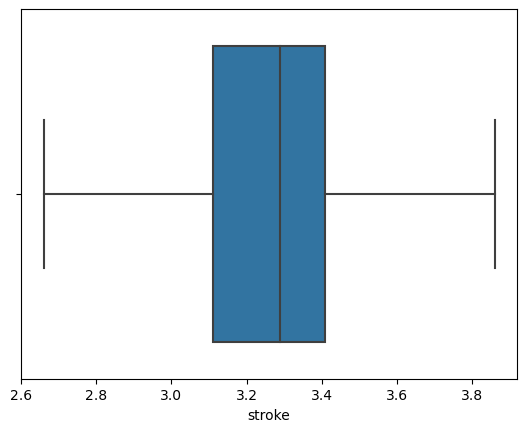

In [31]:
sns.boxplot(x = df_win["stroke"])
plt.show()

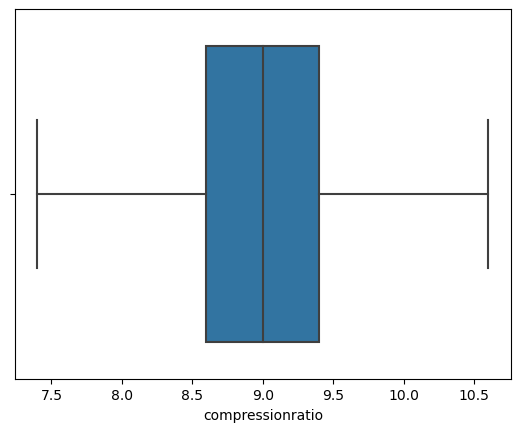

In [32]:
sns.boxplot(x = df_win["compressionratio"])
plt.show()

# Data Cleaning

### Missing Values

In [33]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Outliers

In [27]:

from feature_engine.outliers import Winsorizer

win = Winsorizer(capping_method = "iqr", tail = "both", fold=1.5, variables = ["wheelbase","carlength","carwidth","stroke","compressionratio"])
df_win = win.fit_transform(df[["wheelbase","carlength","carwidth","stroke","compressionratio"]])
df_win

,wheelbase,carlength,carwidth,stroke,compressionratio
0,88.6,168.8,64.1,2.68,9.0
1,88.6,168.8,64.1,2.68,9.0
2,94.5,171.2,65.5,3.47,9.0
3,99.8,176.6,66.2,3.40,10.0
4,99.4,176.6,66.4,3.40,8.0
...,...,...,...,...,...
200,109.1,188.8,68.9,3.15,9.5
201,109.1,188.8,68.8,3.15,8.7
202,109.1,188.8,68.9,2.87,8.8
203,109.1,188.8,68.9,3.40,10.6


# Data Wrangling

### Feature Encoding

In [34]:
df = df.drop(columns = ["car_ID"], axis=1)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [35]:
df_dum = pd.get_dummies(df, drop_first=True)
df_dum

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


# Train-Test Split

In [36]:
x = df_dum.drop(columns='price')
y = df_dum['price']

In [37]:
x

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Step 4) Modeling

# Elasric Net Regression

In [40]:
# Modeling
# import the model
from sklearn.linear_model import ElasticNet

# save the model
elasticnet_model = ElasticNet()

# fit the model
elasticnet_model.fit(x_train,y_train)

ElasticNet()

# Step-5) Predicitons

In [41]:
train_pred = elasticnet_model.predict(x_train)
test_pred = elasticnet_model.predict(x_test)

# Step-6) Evaluation

In [42]:
# train r2 test r2
from sklearn.metrics import r2_score
print("R2 of train data:",r2_score(y_train,train_pred))
print("R2 of test data:",r2_score(y_test,test_pred))

R2 of train data: 0.8721913100053007
R2 of test data: 0.8228776631863615


In [43]:
# Cross Val Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(elasticnet_model,x,y,cv=5)
print(scores)

cv_score = scores.mean()
print("cross validatin score :",cv_score)

[0.76322134 0.86741754 0.13344351 0.74482707 0.1886746 ]
cross validatin score : 0.5395168139817199


In [44]:
from sklearn.model_selection import GridSearchCV

estimator = ElasticNet()

param_grid = {"alpha" :list(range(1,11)),
            "l1_ratio":[0.1,0.5,0.75,0.9,0.95,1]}

model_hp = GridSearchCV(estimator,param_grid, cv=5)
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 10, 'l1_ratio': 1}

In [45]:
# import the model
from sklearn.linear_model import ElasticNet

# save the model
elasticnet_model = ElasticNet(alpha = 10, l1_ratio = 1)

# fit the model
elasticnet_model.fit(x_train,y_train)

train_pred = elasticnet_model.predict(x_train)
test_pred = elasticnet_model.predict(x_test)

# train r2 test r2
from sklearn.metrics import r2_score
print("R2 of train data:",r2_score(y_train,train_pred))
print("R2 of test data:",r2_score(y_test,test_pred))



R2 of train data: 0.9764033133303945
R2 of test data: 0.8299109939421992
